In [1]:
#The goal of our work is to obtain the best prediction possible with Catboost algorithm. 
#Catboost is seen as one of the best Machine Learning algorithm along LightGBM and XGBoost
#We will ignore the exploratory data analysis part for the sake of our prediction

In [2]:
#Let's import everything we need

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import catboost as cb
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import r2_score
from sklearn import metrics
import sklearn as sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Let's load the data

df=pd.read_csv('/kaggle/input/heartcsv/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
len(df)

#We have 303 rows. For Machine Learning standards, this is a very low number. This makes our task harder.
#However, this is often the case with health data. It is very hard to obtain data, especially when it comes to rare diseases.
#This is one of the reason it is very hard to implement Machine Learning in health research.

#Our goal is the beat the college of experts. If several experts meet and use our data, how many of their guesses are going
#to be correct out of all observations. We have to beat this ratio for our model to be deemed viable.

303

age: The age of the patient.

sex: Gender of the patient (0: female, 1: male).

cp: Type of chest pain.

trestbps: Resting blood pressure.

chol: Serum cholesterol.

fbs: Fasting blood sugar > 120 mg/dl.

restecg: Resting electrocardiographic results.

thalach: Maximum heart rate achieved.

exang: Exercise induced angina.

oldpeak: ST depression induced by exercise relative to rest

In [5]:
#We define our y variable. Target. 

X = df.drop('target', axis=1)
y = df['target']

In [6]:
#We train with stratification as we want our train and test data to be the closest possible to real data
#We cannot afford to train randomly with health data

# First split: training set and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Second split: validation set and test set from the temporary set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, stratify=y_temp, random_state=42)

# Combine features and target back into dataframes. We add the reset_index to avoid NaN issues.
train_df = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
val_df = pd.concat([X_val.reset_index(drop=True), y_val.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Display the stratified datasets
print("Training set:")
print(train_df)
print("\nValidation set:")
print(val_df)
print("\nTesting set:")
print(test_df)

#We have successfully avoided NaN and index errors. Good.

Training set:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     62    1   0       120   267    0        1       99      1      1.8   
1     76    0   2       140   197    0        2      116      0      1.1   
2     66    0   2       146   278    0        0      152      0      0.0   
3     29    1   1       130   204    0        0      202      0      0.0   
4     44    1   1       120   220    0        1      170      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
176   71    0   1       160   302    0        1      162      0      0.4   
177   58    0   0       170   225    1        0      146      1      2.8   
178   56    1   2       130   256    1        0      142      1      0.6   
179   55    1   1       130   262    0        1      155      0      0.0   
180   53    1   2       130   246    1        0      173      0      0.0   

     slope  ca  thal  target  
0        1   2     3       0  
1        1 

In [7]:
#How many rows per dataframe ?

print(len(train_df))
print(len(val_df))
print(len(test_df))

181
36
86


In [8]:
#Let's create our model

train_pool = Pool(data=X_train, label=y_train)
model = cb.CatBoostClassifier()

#task_type='GPU' is an option to use in CatBoost Classifier. For an unknown reason it is slower and has worse results than the CPU without specifying hyperparameters
#I recommend being careful with this

In [9]:
#We have added some hyperparameters. However there are plenty we haven't try. See Catboost's documentation for more

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.1, 0.2, 0.3],
        'depth': [1, 2, 4, 6],
        'l2_leaf_reg': [0.1, 0.2, 0.5, 1]}
grid_search_result = model.grid_search(grid, X=train_pool, cv=3)

#We have added crossvalidation. We are trying to see which combination of hyperparameters is the best.

#You have to scroll very far.

0:	learn: 0.6699493	test: 0.6719939	best: 0.6719939 (0)	total: 53.6ms	remaining: 5.31s
1:	learn: 0.6370668	test: 0.6457275	best: 0.6457275 (1)	total: 54.6ms	remaining: 2.67s
2:	learn: 0.6062735	test: 0.6210900	best: 0.6210900 (2)	total: 55.1ms	remaining: 1.78s
3:	learn: 0.5845048	test: 0.6121497	best: 0.6121497 (3)	total: 55.5ms	remaining: 1.33s
4:	learn: 0.5614891	test: 0.5934568	best: 0.5934568 (4)	total: 56ms	remaining: 1.06s
5:	learn: 0.5405315	test: 0.5772678	best: 0.5772678 (5)	total: 56.4ms	remaining: 884ms
6:	learn: 0.5329613	test: 0.5727169	best: 0.5727169 (6)	total: 56.8ms	remaining: 755ms
7:	learn: 0.5165384	test: 0.5607273	best: 0.5607273 (7)	total: 57.3ms	remaining: 658ms
8:	learn: 0.5052710	test: 0.5557143	best: 0.5557143 (8)	total: 57.7ms	remaining: 583ms
9:	learn: 0.4925462	test: 0.5473745	best: 0.5473745 (9)	total: 58.1ms	remaining: 523ms
10:	learn: 0.4778058	test: 0.5404301	best: 0.5404301 (10)	total: 58.5ms	remaining: 473ms
11:	learn: 0.4680555	test: 0.5351913	best: 

In [10]:
#Now, let's find which combination is the best

best_params = grid_search_result['params']

In [11]:
print(best_params)

#This is the best combination we obtain. I recommend tweaking with them a bit more to get even better results.

{'depth': 4, 'learning_rate': 0.2, 'l2_leaf_reg': 0.2, 'iterations': 100}


In [12]:
final_model = CatBoostClassifier(**best_params)
final_model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]), verbose=0)

#We create our final model by combining our CatBoost algorithm with the best hyperparameters.
#Next, we train it on our training set, which combines X_train and X_val.

In [13]:
#We measure the accuracy on the test set. This is a good score.

test_accuracy = final_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.872093023255814


In [14]:
#We predict the value of target with our model on the test set.

y_pred = model.predict(X_test)

In [15]:
#We use the confusion matrix to understand our model's outputs. Using only R2 or accuracy is not enough in Classification

sklearn.metrics.confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)

array([[28, 11],
       [ 5, 42]])

In [16]:
#We use metrics called Specificity and sensitivity. You may know the sensitivity as "recall".

#Specitivity : True negative rate. How many times our model have correctly predicted the negative output.
#Sensitivity (or recall) : True positive rate. How many times our model have correctly predicted the positive output

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [17]:
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
youden_index = sensitivity + specificity - 1

print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("Youden's Index:", youden_index)

#Youden's Index can be used to compare classification models.

#We can see that our model is better at predicting true positives than true negatives.

#Nice prediction. It's a good first step to understand our data.

#This is not enough by healthcare standards as health experts (doctors...) usually have a better score at predicting. But it is a nice first step.
#To get a better prediction, we recommend :

#Increasing the dataset
#Playing with the hyperparameters a bit more
#A bit of feature engineering
#Trying XGBoost and LightGBM

Specificity: 0.717948717948718
Sensitivity: 0.8936170212765957
Youden's Index: 0.6115657392253135


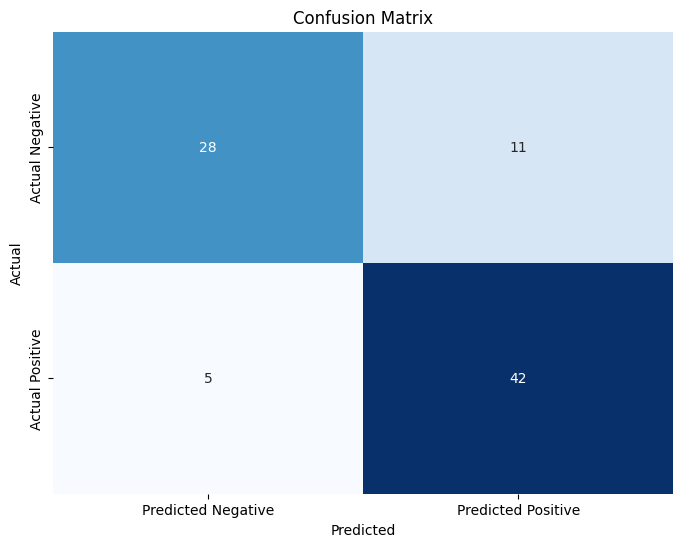

In [18]:
# Let's display the confusion matrix with a nice graph :

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
#You are a true data scientist in the healthcare industry now !

#Add a powerpoint and some documentation, and you are good to go !

In [20]:
#Gives the following error :
#CatBoostError: /src/catboost/catboost/cuda/cuda_lib/cuda_manager.cpp:201: Condition violated: `State == nullptr'

#I couldn't make CUDA work on Kaggle. If you can, try :

params = {
    'iterations': 200,
    'learning_rate': 0.1,
    'depth': 6,
    'l2_leaf_reg': 3,
    'bagging_temperature': 1,
    'task_type': 'GPU',
    'loss_function': 'Logloss',
    'random_seed': 42,
    'verbose': False
}

model1 = CatBoostClassifier(**params)

#You should be able to get even better results by using the GPU and using these hyperparameters.